In [68]:
from wordcloud import WordCloud
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

# Using Reinforcement Learning Keywords

In [2]:
with open("ReinforcementStopwordsDateUpdate.json", "r") as t:
    dfscp = json.load(t)

In [3]:
print(len(dfscp))

5681


In [4]:
df = pd.read_json("ReinforcementStopwordsDateUpdate.json")

In [5]:
df.head()

,Title,Author,Date,Abstract,Keyword,URL,ProcessedAbstract,ProcessedKeyword
0,Introducing individual and social learning int...,"Al-Khateeb, B.,Kendall, G.,\nView details of a...",2012,"In recent years, much research attention has b...","Artificial neural networks,Checkers,evolutiona...",https://www.scopus.com/inward/record.uri?partn...,"recent years , much research attention paid ev...","artificial neural networks , checkers , evolut..."
1,AntBot: Ant colonies for video games(Article)\n,"Recio, G.,Martin, E.,Estebanez, C.,Saez, Y.,\n...",2012,The video game industry is an emerging market ...,"Ant colony optimization,artificial intelligenc...",https://www.scopus.com/inward/record.uri?partn...,video game industry emerging market continues ...,"ant colony optimization , artificial intellige..."
2,Bayesian-game-based fuzzy reinforcement learni...,"Sharma, R.,Spaan, M.T.J.,\nView details of all...",2012,This paper proposes a Bayesian-game-based fuzz...,"Bayesian games (BGs),decentralized partially o...",https://www.scopus.com/inward/record.uri?partn...,paper proposes bayesian-game-based fuzzy reinf...,"bayesian games ( bgs ) , decentralized partial..."
3,Monte carlo tree search for the hide-and-seek ...,"Nijssen, P.,Winands, M.H.M.,\nView details of ...",2012,This paper describes how Monte Carlo tree sear...,"Cooperation in games,imperfect information,Mon...",https://www.scopus.com/inward/record.uri?partn...,paper describes monte carlo tree search ( mcts...,"cooperation games , imperfect information , mo..."
4,Aversive Pavlovian responses affect human inst...,"Rigoli, F.,Pavone, E.F.,Pezzulo, G.,\nView det...",2012,"In neuroscience and psychology, an influential...","Controllability,Goal-directed,Habitual,Pavlovi...",https://www.scopus.com/inward/record.uri?partn...,"neuroscience psychology , influential perspect...","controllability , goal-directed , habitual , p..."


In [6]:
df.info

<bound method DataFrame.info of                                                   Title  \
0     Introducing individual and social learning int...   
1       AntBot: Ant colonies for video games(Article)\n   
2     Bayesian-game-based fuzzy reinforcement learni...   
3     Monte carlo tree search for the hide-and-seek ...   
4     Aversive Pavlovian responses affect human inst...   
...                                                 ...   
5676  Passive Primary/Backup-Based Scheduling for Si...   
5677  A Survey on Nongeostationary Satellite Systems...   
5678  Optimized ANFIS Model for Stable Clustering in...   
5679  Rendering Secure and Trustworthy Edge Intellig...   
5680  Enabling Precision Medicine via Contemporary a...   

                                                 Author  Date  \
0     Al-Khateeb, B.,Kendall, G.,\nView details of a...  2012   
1     Recio, G.,Martin, E.,Estebanez, C.,Saez, Y.,\n...  2012   
2     Sharma, R.,Spaan, M.T.J.,\nView details of all...  2012   

In [7]:
df

,Title,Author,Date,Abstract,Keyword,URL,ProcessedAbstract,ProcessedKeyword
0,Introducing individual and social learning int...,"Al-Khateeb, B.,Kendall, G.,\nView details of a...",2012,"In recent years, much research attention has b...","Artificial neural networks,Checkers,evolutiona...",https://www.scopus.com/inward/record.uri?partn...,"recent years , much research attention paid ev...","artificial neural networks , checkers , evolut..."
1,AntBot: Ant colonies for video games(Article)\n,"Recio, G.,Martin, E.,Estebanez, C.,Saez, Y.,\n...",2012,The video game industry is an emerging market ...,"Ant colony optimization,artificial intelligenc...",https://www.scopus.com/inward/record.uri?partn...,video game industry emerging market continues ...,"ant colony optimization , artificial intellige..."
2,Bayesian-game-based fuzzy reinforcement learni...,"Sharma, R.,Spaan, M.T.J.,\nView details of all...",2012,This paper proposes a Bayesian-game-based fuzz...,"Bayesian games (BGs),decentralized partially o...",https://www.scopus.com/inward/record.uri?partn...,paper proposes bayesian-game-based fuzzy reinf...,"bayesian games ( bgs ) , decentralized partial..."
3,Monte carlo tree search for the hide-and-seek ...,"Nijssen, P.,Winands, M.H.M.,\nView details of ...",2012,This paper describes how Monte Carlo tree sear...,"Cooperation in games,imperfect information,Mon...",https://www.scopus.com/inward/record.uri?partn...,paper describes monte carlo tree search ( mcts...,"cooperation games , imperfect information , mo..."
4,Aversive Pavlovian responses affect human inst...,"Rigoli, F.,Pavone, E.F.,Pezzulo, G.,\nView det...",2012,"In neuroscience and psychology, an influential...","Controllability,Goal-directed,Habitual,Pavlovi...",https://www.scopus.com/inward/record.uri?partn...,"neuroscience psychology , influential perspect...","controllability , goal-directed , habitual , p..."
...,...,...,...,...,...,...,...,...
5676,Passive Primary/Backup-Based Scheduling for Si...,"Yari-Karin, S.,Siyadatzadeh, R.,Ansari, M.,Ejl...",2023,In addition to meeting the real-time constrain...,"Embedded systems,fault-tolerance,heterogeneous...",https://www.scopus.com/inward/record.uri?partn...,"addition meeting real-time constraint , power/...","embedded systems , fault-tolerance , heterogen..."
5677,A Survey on Nongeostationary Satellite Systems...,"Al-Hraishawi, H.,Chougrani, H.,Kisseleff, S.,L...",2023,The next phase of satellite technology is bein...,Non-geostationary (NGSO) satellite constellati...,https://www.scopus.com/inward/record.uri?partn...,next phase satellite technology characterized ...,non-geostationary ( ngso ) satellite constella...
5678,Optimized ANFIS Model for Stable Clustering in...,"Ambhika, C.,Murukesh, C.",2023,"With the demand for wireless technology, Cogni...","ANFIS,cluster,cognitive,hybrid optimization,PSWO",https://www.scopus.com/inward/record.uri?partn...,"demand wireless technology , cognitive radio (...","anfis , cluster , cognitive , hybrid optimizat..."
5679,Rendering Secure and Trustworthy Edge Intellig...,"Qiu, C.,Aujla, G.S.,Jiang, J.,Wen, W.,Zhang, P...",2023,Industrial Internet of Things (IIoT) and fifth...,"Blockchain,edge intelligence,industrial Intern...",https://www.scopus.com/inward/record.uri?partn...,industrial internet things ( iiot ) fifth gene...,"blockchain , edge intelligence , industrial in..."


# Data Visualization (Reinforcement)

In [8]:
df["Date"].value_counts()

Date
2022    1446
2021    1118
2020     941
2023     725
2019     433
2018     238
2017     201
2016     152
2014     139
2013     124
2015      96
2012      68
Name: count, dtype: int64

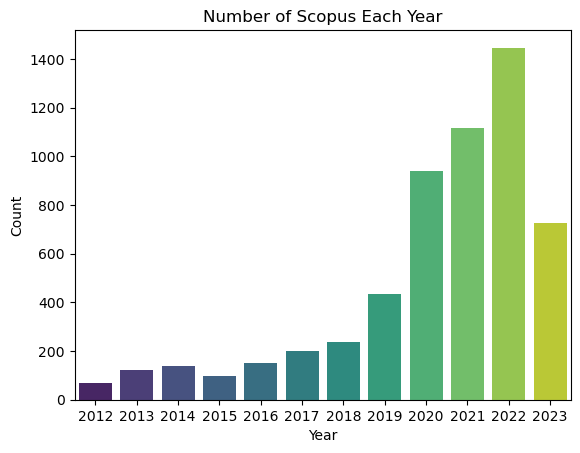

In [9]:
value_counts_series = df['Date'].value_counts()

# Create a bar chart using Seaborn
sns.barplot(x=value_counts_series.index, y=value_counts_series.values, palette='viridis')
plt.title('Number of Scopus Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Word Cloud From Scopus

In [10]:
df["Keyword"] = df["Keyword"].replace({',':' '},regex=True)
df["Keyword"]

0       Artificial neural networks Checkers evolutiona...
1       Ant colony optimization artificial intelligenc...
2       Bayesian games (BGs) decentralized partially o...
3       Cooperation in games imperfect information Mon...
4       Controllability Goal-directed Habitual Pavlovi...
                              ...                        
5676    Embedded systems fault-tolerance heterogeneous...
5677    Non-geostationary (NGSO) satellite constellati...
5678     ANFIS cluster cognitive hybrid optimization PSWO
5679    Blockchain edge intelligence industrial Intern...
5680    5G 6G communication technologies fourth indust...
Name: Keyword, Length: 5681, dtype: object

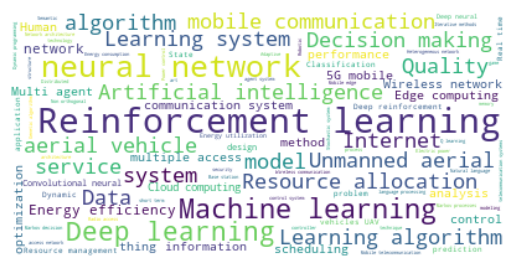

In [11]:
text = " ".join(review for review in df.Keyword)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Using Computer Vision Keywords

In [12]:
with open("CVStopwordsDateUpdate.json", "r") as t:
    dfscpCV = json.load(t)

In [13]:
print(len(dfscpCV))

9975


In [14]:
dfCV = pd.read_json("CVStopwordsDateUpdate.json")

In [15]:
dfCV.head()

,Title,Author,Date,Abstract,Keyword,URL,ProcessedAbstract,ProcessedKeyword
0,Unsupervised video leap segmentation for fast ...,"Forsthoefel, D.,Wills, D.S.,Wills, L.M.,\nView...",2012,"Multiple-frame segmentation, also referred to ...","False positive,Image information,Intelligent v...",https://www.scopus.com/inward/record.uri?partn...,"multiple-frame segmentation , also referred vi...","false positive , image information , intellige..."
1,Audio-based human activity recognition using N...,"Stork, J.A.,Spinello, L.,Silva, J.,Arras, K.O....",2012,Human activity recognition is a key component ...,"Audio stream,Audio-based,Classification techni...",https://www.scopus.com/inward/record.uri?partn...,human activity recognition key component socia...,"audio stream , audio-based , classification te..."
2,A background reconstruction algorithm based on...,"Ye, L.,Yin, H.,Gong, X.,\t\t\t\nView details o...",2012,This paper investigates the challenges faced w...,"Aquatic surveillance system,Background reconst...",https://www.scopus.com/inward/record.uri?partn...,paper investigates challenges faced reconstruc...,"aquatic surveillance system , background recon..."
3,Eyes closeness detection using appearance base...,"Liu, X.,Tan, X.,Chen, S.,\nView details of all...",2012,Human eye closeness detection has gained wide ...,"Eye closeness detection,Eye state measurement,...",https://www.scopus.com/inward/record.uri?partn...,human eye closeness detection gained wide appl...,"eye closeness detection , eye state measuremen..."
4,Difficulty guided image retrieval using linear...,"Li, Y.,Geng, B.,Tao, D.,Zha, Z.-J.,Yang, L.,Xu...",2012,Existing image retrieval systems suffer from a...,"Content based image retrieval,query difficulty...",https://www.scopus.com/inward/record.uri?partn...,existing image retrieval systems suffer perfor...,"content based image retrieval , query difficul..."


In [16]:
dfCV["Date"].value_counts()

Date
2022    1755
2021    1534
2020    1367
2019     918
2023     776
2018     731
2017     619
2015     548
2014     536
2013     507
2016     451
2012     233
Name: count, dtype: int64

# Data Visualization (Computer Vision)

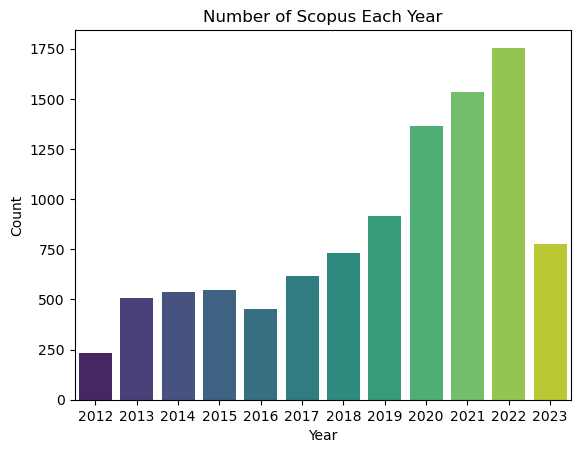

In [17]:
value_counts_series = dfCV['Date'].value_counts()

# Create a bar chart using Seaborn
sns.barplot(x=value_counts_series.index, y=value_counts_series.values, palette='viridis')
plt.title('Number of Scopus Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

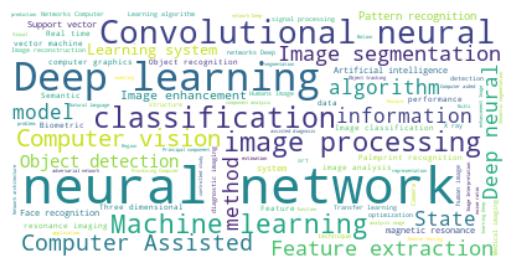

In [18]:
text = " ".join(review for review in dfCV.Keyword)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Keyword Extraction

In [19]:


dfCV = pd.read_json('Data_For_DataMining/ComputerVisionKeywordExtraction.json')
df.head(10)

,Title,Author,Date,Abstract,Keyword,URL,ProcessedAbstract,ProcessedKeyword
0,Introducing individual and social learning int...,"Al-Khateeb, B.,Kendall, G.,\nView details of a...",2012,"In recent years, much research attention has b...",Artificial neural networks Checkers evolutiona...,https://www.scopus.com/inward/record.uri?partn...,"recent years , much research attention paid ev...","artificial neural networks , checkers , evolut..."
1,AntBot: Ant colonies for video games(Article)\n,"Recio, G.,Martin, E.,Estebanez, C.,Saez, Y.,\n...",2012,The video game industry is an emerging market ...,Ant colony optimization artificial intelligenc...,https://www.scopus.com/inward/record.uri?partn...,video game industry emerging market continues ...,"ant colony optimization , artificial intellige..."
2,Bayesian-game-based fuzzy reinforcement learni...,"Sharma, R.,Spaan, M.T.J.,\nView details of all...",2012,This paper proposes a Bayesian-game-based fuzz...,Bayesian games (BGs) decentralized partially o...,https://www.scopus.com/inward/record.uri?partn...,paper proposes bayesian-game-based fuzzy reinf...,"bayesian games ( bgs ) , decentralized partial..."
3,Monte carlo tree search for the hide-and-seek ...,"Nijssen, P.,Winands, M.H.M.,\nView details of ...",2012,This paper describes how Monte Carlo tree sear...,Cooperation in games imperfect information Mon...,https://www.scopus.com/inward/record.uri?partn...,paper describes monte carlo tree search ( mcts...,"cooperation games , imperfect information , mo..."
4,Aversive Pavlovian responses affect human inst...,"Rigoli, F.,Pavone, E.F.,Pezzulo, G.,\nView det...",2012,"In neuroscience and psychology, an influential...",Controllability Goal-directed Habitual Pavlovi...,https://www.scopus.com/inward/record.uri?partn...,"neuroscience psychology , influential perspect...","controllability , goal-directed , habitual , p..."
5,Distributed protocols for multi-agent coalitio...,"ToÅ¡iÄ‡, P.T.,Ordonez, C.,\nView details of al...",2012,We investigate collaborative multi-agent syste...,coalition formation collaborative multi-agent ...,https://www.scopus.com/inward/record.uri?partn...,investigate collaborative multi-agent systems ...,"coalition formation , collaborative multi-agen..."
6,Issues in spoken dialogue systems for human-co...,"Siddiqui, T.J.,Tiwary, U.S.",2012,Spoken dialogue systems are a step forward tow...,,https://www.scopus.com/inward/record.uri?partn...,spoken dialogue systems step forward towards r...,
7,On the development of adaptive and user-centre...,"Griol, D.,Callejas, Z.,LÃ³pez-CÃ³zar, R.,Espej...",2012,Multimodal systems have attained increased att...,,https://www.scopus.com/inward/record.uri?partn...,multimodal systems attained increased attentio...,
8,Working together with computers: Towards a gen...,"Tiwary, U.S.,Siddiqui, T.J.,\t\t\t\nView detai...",2012,The objective of this chapter is twofold. On o...,,https://www.scopus.com/inward/record.uri?partn...,"objective chapter twofold . one hand , tries i...",
9,Geometric methods in modern biomechanics\n (B...,"Ivancevic, T.T.,Ivancevic, V.G.,Jovanovic, B.,...",2012,This book gives a comprehensive introduction i...,,https://www.scopus.com/inward/record.uri?partn...,book gives comprehensive introduction geometri...,


In [20]:
dfRL = pd.read_json('Data_For_DataMining/ReinforcementKeywordExtraction.json')
df.head(10)

,Title,Author,Date,Abstract,Keyword,URL,ProcessedAbstract,ProcessedKeyword
0,Introducing individual and social learning int...,"Al-Khateeb, B.,Kendall, G.,\nView details of a...",2012,"In recent years, much research attention has b...",Artificial neural networks Checkers evolutiona...,https://www.scopus.com/inward/record.uri?partn...,"recent years , much research attention paid ev...","artificial neural networks , checkers , evolut..."
1,AntBot: Ant colonies for video games(Article)\n,"Recio, G.,Martin, E.,Estebanez, C.,Saez, Y.,\n...",2012,The video game industry is an emerging market ...,Ant colony optimization artificial intelligenc...,https://www.scopus.com/inward/record.uri?partn...,video game industry emerging market continues ...,"ant colony optimization , artificial intellige..."
2,Bayesian-game-based fuzzy reinforcement learni...,"Sharma, R.,Spaan, M.T.J.,\nView details of all...",2012,This paper proposes a Bayesian-game-based fuzz...,Bayesian games (BGs) decentralized partially o...,https://www.scopus.com/inward/record.uri?partn...,paper proposes bayesian-game-based fuzzy reinf...,"bayesian games ( bgs ) , decentralized partial..."
3,Monte carlo tree search for the hide-and-seek ...,"Nijssen, P.,Winands, M.H.M.,\nView details of ...",2012,This paper describes how Monte Carlo tree sear...,Cooperation in games imperfect information Mon...,https://www.scopus.com/inward/record.uri?partn...,paper describes monte carlo tree search ( mcts...,"cooperation games , imperfect information , mo..."
4,Aversive Pavlovian responses affect human inst...,"Rigoli, F.,Pavone, E.F.,Pezzulo, G.,\nView det...",2012,"In neuroscience and psychology, an influential...",Controllability Goal-directed Habitual Pavlovi...,https://www.scopus.com/inward/record.uri?partn...,"neuroscience psychology , influential perspect...","controllability , goal-directed , habitual , p..."
5,Distributed protocols for multi-agent coalitio...,"ToÅ¡iÄ‡, P.T.,Ordonez, C.,\nView details of al...",2012,We investigate collaborative multi-agent syste...,coalition formation collaborative multi-agent ...,https://www.scopus.com/inward/record.uri?partn...,investigate collaborative multi-agent systems ...,"coalition formation , collaborative multi-agen..."
6,Issues in spoken dialogue systems for human-co...,"Siddiqui, T.J.,Tiwary, U.S.",2012,Spoken dialogue systems are a step forward tow...,,https://www.scopus.com/inward/record.uri?partn...,spoken dialogue systems step forward towards r...,
7,On the development of adaptive and user-centre...,"Griol, D.,Callejas, Z.,LÃ³pez-CÃ³zar, R.,Espej...",2012,Multimodal systems have attained increased att...,,https://www.scopus.com/inward/record.uri?partn...,multimodal systems attained increased attentio...,
8,Working together with computers: Towards a gen...,"Tiwary, U.S.,Siddiqui, T.J.,\t\t\t\nView detai...",2012,The objective of this chapter is twofold. On o...,,https://www.scopus.com/inward/record.uri?partn...,"objective chapter twofold . one hand , tries i...",
9,Geometric methods in modern biomechanics\n (B...,"Ivancevic, T.T.,Ivancevic, V.G.,Jovanovic, B.,...",2012,This book gives a comprehensive introduction i...,,https://www.scopus.com/inward/record.uri?partn...,book gives comprehensive introduction geometri...,


In [21]:
print(dfCV["Keyword_Extraction"][0][0][0])
dfCV["Keyword_Extraction"][0]
dfCV["Keyword_Extraction"][0][0]

video segmentation


['video segmentation', 0.5381]

In [22]:
end = len(dfCV)
end

9975

In [23]:
end = len(dfRL)
end

5681

In [24]:
count1 = 0
count2 = 0

with open("Data_For_DataMining/ComputerVision_Word2Vec_PreProcess.json", "w", newline='') as outfile:
    while count1 <= end:
        try:

            NewKeywordExtraction = dfCV["Keyword_Extraction"][count1][count2][0]
            count2=count2 + 1
            print("{} of {} data".format(count1,end))
            print(NewKeywordExtraction)
            
            scopus = {
                'Keyword_Extraction':NewKeywordExtraction,
            }

            json_object = json.dumps(scopus, indent=4)
            outfile.write(json_object)
            
            if count2 == 4:
                count2 = 0
                count1 = count1 + 1
        except:
            print("Out of index")
            count1 = count1 + 1

    print("All Keyword has been seperated")

outfile.close()

0 of 5681 data
video segmentation
0 of 5681 data
frame segmentation
0 of 5681 data
leap segmentation
0 of 5681 data
vehicle video
1 of 5681 data
activity recognition
1 of 5681 data
human activities
1 of 5681 data
human activity
1 of 5681 data
activities bathroom
2 of 5681 data
aquatic surveillance
2 of 5681 data
background reconstruction
2 of 5681 data
reconstructing background
2 of 5681 data
background outdoor
3 of 5681 data
eye closeness
3 of 5681 data
closeness detection
3 of 5681 data
eye alignment
3 of 5681 data
human eye
4 of 5681 data
image retrieval
4 of 5681 data
retrieval predict
4 of 5681 data
retrieval results
4 of 5681 data
image query
5 of 5681 data
biometric template
5 of 5681 data
palmprint authentication
5 of 5681 data
generalized palmprint
5 of 5681 data
protection biometric
6 of 5681 data
sampling rotation
6 of 5681 data
3d rotations
6 of 5681 data
uniform 3d
6 of 5681 data
shape models
7 of 5681 data
computer energy
7 of 5681 data
display energy
7 of 5681 data
perso

In [27]:
count1 = 0
count2 = 0

with open("Data_For_DataMining/ReinforcementLearning_Word2Vec_PreProcess.json", "w", newline='') as outfile:
    while count1 <= end:
        try:

            NewKeywordExtraction = dfRL["Keyword_Extraction"][count1][count2][0]
            count2=count2 + 1
            print("{} of {} data".format(count1,end))
            print(NewKeywordExtraction)
            
            scopus = {
                'Keyword_Extraction':NewKeywordExtraction,
            }

            json_object = json.dumps(scopus, indent=4)
            outfile.write(json_object)
            
            if count2 == 4:
                count2 = 0
                count1 = count1 + 1
        except:
            print("Out of index")
            count1 = count1 + 1

    print("All Keyword has been seperated")

outfile.close()

0 of 5681 data
player evolved
0 of 5681 data
evolve game
0 of 5681 data
evolutionary checkers
0 of 5681 data
evolution strategy
1 of 5681 data
swarm intelligence
1 of 5681 data
dynamic game
1 of 5681 data
game bots
1 of 5681 data
based swarm
2 of 5681 data
pomdp fuzzy
2 of 5681 data
pomdp controllers
2 of 5681 data
bayesian games
2 of 5681 data
bayesian game
3 of 5681 data
seek game
3 of 5681 data
information game
3 of 5681 data
seekers play
3 of 5681 data
player game
4 of 5681 data
pavlovian responses
4 of 5681 data
behavioral control
4 of 5681 data
effects pavlovian
4 of 5681 data
behavioral experiment
5 of 5681 data
distributed coalition
5 of 5681 data
collaborative coalition
5 of 5681 data
coalition formation
5 of 5681 data
collaborative agents
6 of 5681 data
dialogue systems
6 of 5681 data
dialog systems
6 of 5681 data
spoken dialog
6 of 5681 data
spoken dialogue
7 of 5681 data
affective multimodal
7 of 5681 data
human multimodal
7 of 5681 data
multimodal interfaces
7 of 5681 data

# CV のWord2Vec(Keyword from KeyBERT)

In [28]:
df = pd.read_json('Data_For_DataMining/ComputerVision_Word2Vec_PreProcess.json')
df

,Keyword_Extraction
0,video segmentation
1,frame segmentation
2,leap segmentation
3,vehicle video
4,activity recognition
...,...
22459,machine translation
22460,adversarial
22461,adversarial images
22462,adversarial attacks


In [29]:
str(df["Keyword_Extraction"])

'0                 video segmentation\n1                 frame segmentation\n2                  leap segmentation\n3                      vehicle video\n4               activity recognition\n                    ...             \n22459            machine translation\n22460                    adversarial\n22461             adversarial images\n22462            adversarial attacks\n22463    countermeasures adversarial\nName: Keyword_Extraction, Length: 22464, dtype: object'

In [30]:


Data = df["Keyword_Extraction"].values
Data

array(['video segmentation', 'frame segmentation', 'leap segmentation',
       ..., 'adversarial images', 'adversarial attacks',
       'countermeasures adversarial'], dtype=object)

In [31]:
newData = [nltk.word_tokenize(Keyword_Extraction) for Keyword_Extraction in Data]

In [32]:
newData
len(newData)

22464

In [33]:
model_keyword_CV = Word2Vec(newData,min_count=1,vector_size=100)

In [34]:
model_keyword_CV.wv.most_similar('object')

[('tracking', 0.968478262424469),
 ('cnn', 0.9649430513381958),
 ('classification', 0.9636123180389404),
 ('learning', 0.9629603624343872),
 ('visual', 0.9629075527191162),
 ('adversarial', 0.9624434113502502),
 ('segmentation', 0.9619150757789612),
 ('biometrics', 0.9606194496154785),
 ('training', 0.960568368434906),
 ('imaging', 0.9600102305412292)]

In [35]:
model_keyword_CV.wv['object']

array([-0.00526063,  0.0280345 ,  0.00307379,  0.00894192,  0.00298155,
       -0.04459989,  0.02623758,  0.08243388, -0.04118842, -0.03531221,
       -0.0161922 , -0.06266285,  0.00622271,  0.02571325,  0.00843574,
       -0.03126016,  0.00879703, -0.05055211, -0.00688297, -0.06296933,
        0.02517009,  0.00417647,  0.02884444, -0.01850873, -0.03925688,
        0.00722338, -0.02964075, -0.03376358, -0.02482541,  0.01522819,
        0.04536919, -0.01029254, -0.00118127, -0.02952441, -0.00574646,
        0.05293456, -0.00681166, -0.02157944, -0.03217058, -0.07148284,
       -0.00970822, -0.01871071, -0.00767186,  0.02523766,  0.02439951,
       -0.02802263, -0.03428418, -0.02125267,  0.00951793,  0.01622441,
        0.01988295, -0.04448046, -0.00949094, -0.02156112, -0.01866343,
        0.02584119,  0.0241816 ,  0.0087656 , -0.04537979,  0.00579554,
        0.00795261, -0.00442509, -0.00421772, -0.00789917, -0.04950029,
        0.03641625,  0.00236184,  0.03462779, -0.04801707,  0.03

In [36]:
model_keyword_CV.wv.init_sims()

C:\Users\yoshu\AppData\Local\Temp\ipykernel_13000\2917797744.py:1: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model_keyword_CV.wv.init_sims()


# Word2Vec(Raw Abstract)

In [37]:
df = pd.read_json('Data_For_DataMining/ComputerVisionStopwordsDateUpdate.json')
df["Abstract"].values

array(['Multiple-frame segmentation, also referred to as video segmentation, is an important step in many video analysis applications for identifying and tracking specific features as they move through a scene. In a mobile, resource-constrained environment such as an intelligent vehicle system, video segmentation can be utilized in preprocessing to reduce image information and increase processing efficiency for high-level scene understanding applications. We introduce video leap segmentation, a highly efficient multiple-frame segmentation approach for use on embedded and mobile platforms where processing speed is critical. The proposed method is demonstrated to successfully track segments across spatial and temporal bounds, generating fast, stable segmentations of images from captured moving-camera video sequences. Video leap segmentation is applied to the task of rough salient segment transformation detection for alerting potential drivers of critical scene changes that may affect ste

In [38]:
newData = [nltk.word_tokenize(Abstract) for Abstract in df["Abstract"].values]

In [39]:
newData
len(newData)

9975

In [40]:
model_abs_CV = Word2Vec(newData,min_count=1,vector_size=100)

In [41]:
model_abs_CV.wv.most_similar('object')

[('target', 0.7318350672721863),
 ('text', 0.7305891513824463),
 ('pedestrian', 0.6691194772720337),
 ('objects', 0.6537460088729858),
 ('instance', 0.6164154410362244),
 ('firearms', 0.6159448623657227),
 ('scene', 0.6007037162780762),
 ('saliency', 0.5993809700012207),
 ('anomaly', 0.5831030607223511),
 ('edge', 0.5795667767524719)]

In [42]:
model_abs_CV.wv.init_sims()

C:\Users\yoshu\AppData\Local\Temp\ipykernel_13000\2474377514.py:1: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model_abs_CV.wv.init_sims()


In [43]:
df = pd.read_json('Data_For_DataMining/ComputerVisionStopwordsDateUpdate.json')
newData = [nltk.word_tokenize(ProcessedAbstract) for ProcessedAbstract in df["ProcessedAbstract"].values]
model_PROabs_CV = Word2Vec(newData,min_count=1,vector_size=100)
model_PROabs_CV.wv.init_sims()

C:\Users\yoshu\AppData\Local\Temp\ipykernel_13000\2999216895.py:4: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model_PROabs_CV.wv.init_sims()


# RL のWord2Vec(Keyword from KeyBERT)

In [44]:
df = pd.read_json('Data_For_DataMining/Reinforcement_Word2Vec_PreProcess.json')
Data = df["Keyword_Extraction"].values
newData = [nltk.word_tokenize(Keyword_Extraction) for Keyword_Extraction in Data]
model_keyword_RL = Word2Vec(newData,min_count=1,vector_size=100)
model_keyword_RL.wv.init_sims()

C:\Users\yoshu\AppData\Local\Temp\ipykernel_13000\1044175946.py:5: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model_keyword_RL.wv.init_sims()


# RL Word2Vec(Raw Abstract)

In [45]:
df = pd.read_json('Data_For_DataMining/ReinforcementStopwordsDateUpdate.json')
newData = [nltk.word_tokenize(Abstract) for Abstract in df["Abstract"].values]
model_abs_RL = Word2Vec(newData,min_count=1,vector_size=100)
model_abs_RL.wv.init_sims()

C:\Users\yoshu\AppData\Local\Temp\ipykernel_13000\4026469863.py:4: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model_abs_RL.wv.init_sims()


In [46]:
df = pd.read_json('Data_For_DataMining/ReinforcementStopwordsDateUpdate.json')
newData = [nltk.word_tokenize(ProcessedAbstract) for ProcessedAbstract in df["ProcessedAbstract"].values]
model_PROabs_RL = Word2Vec(newData,min_count=1,vector_size=100)
model_PROabs_RL.wv.init_sims()

C:\Users\yoshu\AppData\Local\Temp\ipykernel_13000\3056313736.py:4: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model_PROabs_RL.wv.init_sims()


# PCA and CLUSTERING

# (Computer Vision)

In [47]:

#KeyBERT
cv_vocab_len_keyBERT = len(model_keyword_CV.wv)
cv_vector_keyBERT = model_keyword_CV.wv.vectors

scaler = StandardScaler()
cv_data_scaled_keyBERT = scaler.fit_transform(cv_vector_keyBERT)

cv_words_keyBERT = list(model_keyword_CV.wv.key_to_index)
pca = PCA(n_components=2)
cv_PCA_result_keyBERT = pca.fit_transform(cv_data_scaled_keyBERT)

#Raw Abstract

cv_vocab_len_abs = len(model_abs_CV.wv)
cv_vector_abs = model_abs_CV.wv.vectors

scaler = StandardScaler()
cv_data_scaled_abs = scaler.fit_transform(cv_vector_abs)

cv_words_abs = list(model_abs_CV.wv.key_to_index)
pca = PCA(n_components=2)
cv_PCA_result_abs = pca.fit_transform(cv_data_scaled_abs)


#Processed Abstract

cv_vocab_len_PROabs = len(model_PROabs_CV.wv)
cv_vector_PROabs = model_PROabs_CV.wv.vectors

scaler = StandardScaler()
cv_data_scaled_PROabs = scaler.fit_transform(cv_vector_PROabs)

cv_words_PROabs = list(model_PROabs_CV.wv.key_to_index)
pca = PCA(n_components=2)
cv_PCA_result_PROabs = pca.fit_transform(cv_data_scaled_PROabs)


#PCA_result

In [48]:
cv_data_scaled_keyBERT
cv_data_scaled_abs
cv_PCA_result_PROabs

array([[17.676195  ,  0.47510114],
       [14.701503  ,  0.7021154 ],
       [ 9.094699  , -0.30076125],
       ...,
       [-2.100439  , -0.509314  ],
       [-2.0001905 , -0.45816073],
       [-1.9431131 , -0.7031699 ]], dtype=float32)

In [49]:
len(model_keyword_CV.wv)

3730

In [50]:
words = pd.DataFrame(cv_words_keyBERT)
PCA_result = pd.DataFrame(cv_PCA_result_keyBERT)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('Data_For_DataMining/Results/PCA_CV_Keyword.csv',index=False)




In [51]:
print(PCA_data_complet)

             word   x_values  y_values
0     recognition  48.379917  0.570827
1           image  63.107780 -0.868103
2       palmprint  37.578640 -0.411892
3          images  59.608578 -1.021175
4       biometric  51.376938 -2.111057
...           ...        ...       ...
3725    minimized  -3.235916 -0.330822
3726  aberrations  -2.447867 -0.486828
3727   eyeglasses  -2.390487  0.305695
3728    tailoring  -2.690380  0.332125
3729      retinaâ  -2.890485  1.556187

[3730 rows x 3 columns]


In [52]:
words = pd.DataFrame(cv_PCA_result_abs)
PCA_result = pd.DataFrame(cv_PCA_result_abs)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('Data_For_DataMining/Results/PCA_CV_abs.csv',index=False)

print(PCA_data_complet)

            word   x_values   y_values
0      31.623785  31.623785 -14.209520
1      15.570026  15.570026   2.479363
2      14.162761  14.162761   0.900719
3      26.592936  26.592936  -8.546437
4      15.476457  15.476457  -0.267894
...          ...        ...        ...
41491  -0.990536  -0.990536  -1.524116
41492  -0.987223  -0.987223  -1.562257
41493  -0.893619  -0.893619  -1.385132
41494  -1.137793  -1.137793  -1.533756
41495  -1.094371  -1.094371  -1.533820

[41496 rows x 3 columns]


In [53]:
words = pd.DataFrame(cv_words_PROabs)
PCA_result = pd.DataFrame(cv_PCA_result_PROabs)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('Data_For_DataMining/Results/PCA_CV_PROabs.csv',index=False)

print(PCA_data_complet)

                 word   x_values   y_values
0                   .  17.676195   0.475101
1                   ,  14.701503   0.702115
2                   )   9.094699  -0.300761
3                   (   3.364285   4.593627
4                  â©   7.926505  10.999822
...               ...        ...        ...
36657          910.52  -2.020931  -0.266233
36658           85.26  -2.104800  -0.426663
36659            9.25  -2.100439  -0.509314
36660          143.00  -2.000190  -0.458161
36661  descriptorâ€™s  -1.943113  -0.703170

[36662 rows x 3 columns]


# (Reinforcement Learning)

In [54]:
#KeyBERT
RL_vocab_len_keyBERT = len(model_keyword_RL.wv)
RL_vector_keyBERT = model_keyword_RL.wv.vectors

scaler = StandardScaler()
RL_data_scaled_keyBERT = scaler.fit_transform(RL_vector_keyBERT)

RL_words_keyBERT = list(model_keyword_RL.wv.key_to_index)
pca = PCA(n_components=2)
RL_PCA_result_keyBERT = pca.fit_transform(RL_data_scaled_keyBERT)

#Raw Abstract

RL_vocab_len_abs = len(model_abs_RL.wv)
RL_vector_abs = model_abs_RL.wv.vectors

scaler = StandardScaler()
RL_data_scaled_abs = scaler.fit_transform(RL_vector_abs)

RL_words_abs = list(model_abs_RL.wv.key_to_index)
pca = PCA(n_components=2)
RL_PCA_result_abs = pca.fit_transform(RL_data_scaled_abs)


#Processed Abstract

RL_vocab_len_PROabs = len(model_PROabs_RL.wv)
RL_vector_PROabs = model_PROabs_RL.wv.vectors

scaler = StandardScaler()
RL_data_scaled_PROabs = scaler.fit_transform(RL_vector_PROabs)

RL_words_PROabs = list(model_PROabs_RL.wv.key_to_index)
pca = PCA(n_components=2)
RL_PCA_result_PROabs = pca.fit_transform(RL_data_scaled_PROabs)

In [55]:
words = pd.DataFrame(RL_words_keyBERT)
PCA_result = pd.DataFrame(RL_PCA_result_keyBERT)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('Data_For_DataMining/Results/PCA_RL_Keyword.csv',index=False)

print(PCA_data_complet)

             word   x_values  y_values
0        learning  46.841728  2.668381
1              5g  28.841900 -1.936248
2             uav  42.598755 -2.237576
3         network  39.387600 -2.407627
4        networks  32.346760 -1.150425
...           ...        ...       ...
4517        steps  -3.315607  0.931889
4518    thermally  -1.125196 -1.235829
4519    maximized  -1.987325  0.105030
4520  microscopic  -3.402416  0.296343
4521           pm  -2.400940 -0.137274

[4522 rows x 3 columns]


In [56]:
words = pd.DataFrame(RL_PCA_result_abs)
PCA_result = pd.DataFrame(RL_PCA_result_abs)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('Data_For_DataMining/Results/PCA_RL_abs.csv',index=False)

print(PCA_data_complet)

            word   x_values   y_values
0      23.838995  23.838995 -18.530621
1       9.826798   9.826798  -1.579669
2      15.292168  15.292168   1.729237
3      19.431341  19.431341 -11.393225
4      12.024750  12.024750   0.039549
...          ...        ...        ...
31063  -2.112387  -2.112387  -0.917494
31064  -1.812658  -1.812658  -0.906406
31065  -1.348013  -1.348013  -0.446059
31066  -2.102175  -2.102175  -0.895683
31067  -1.935438  -1.935438  -1.012467

[31068 rows x 3 columns]


In [57]:
words = pd.DataFrame(RL_words_PROabs)
PCA_result = pd.DataFrame(RL_PCA_result_PROabs)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('Data_For_DataMining/Results/PCA_RL_PROabs.csv',index=False)

print(PCA_data_complet)

               word   x_values  y_values
0                 ,  12.601091  4.828800
1                 .  17.285076  3.652901
2                 )  12.531593  9.518710
3                 (  15.059682  8.950083
4                â©  18.768312  6.876808
...             ...        ...       ...
27467   tointerface  -2.887088  0.195897
27468         onthe  -3.143571 -0.002367
27469  orchestrated  -3.099436  0.022232
27470     reversion  -3.281738 -0.460621
27471     collapses  -3.114854 -0.154809

[27472 rows x 3 columns]


# Frequent Word Calculation

In [58]:
df = pd.read_json('Data_For_DataMining/ComputerVision_Word2Vec_PreProcess.json')

# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(df.Keyword_Extraction)
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('Data_For_DataMining/Results/top100_words_CV_Keyword.csv', columns=['word','count'], index=False)
words_all

,word,count
0,recognition,936
1,image,917
2,palmprint,913
3,images,669
4,biometric,626
...,...,...
95,hand,70
96,gesture,70
97,coding,69
98,classifiers,68


In [59]:
# restriction to 50 most frequent words
top100_words = pd.read_csv('top100_words_CV_Keyword.csv')
PCA_data_top_100 = PCA_data_complet.merge(top100_words, how='inner', left_on='word',right_on='word')
PCA_data_top_100.to_csv('Data_For_DataMining/Results/PCA_CV_Keyword_top_100.csv', index=False)

#PCAdf = pd.read_csv('PCA_data_top_100.csv')
x = PCA_result.iloc[:,2:]
PCA_data_top_100

,word,x_values,y_values,count
0,learning,27.243868,-9.580318,946
1,data,22.954578,1.696186,390
2,network,20.631622,1.757497,369
3,model,22.060667,-34.556168,275
4,algorithm,27.807146,-51.581242,210
...,...,...,...,...
95,saliency,-1.776053,-1.202049,233
96,descriptors,-1.994729,-0.239962,147
97,skin,-1.582427,-0.207142,128
98,palmprint,-2.683574,0.010647,1096


In [60]:
df = pd.read_json('Data_For_DataMining/ComputerVisionStopwordsDateUpdate.json')

# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(df.Abstract)
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('Data_For_DataMining/Results/top100_words_CV_abs.csv', columns=['word','count'], index=False)
words_all

,word,count
0,the,99098
1,of,63231
2,and,56831
3,to,41332
4,a,36324
...,...,...
95,high,1832
96,visual,1826
97,video,1802
98,analysis,1793


In [61]:
# restriction to 50 most frequent words
top100_words = pd.read_csv('top100_words_CV_abs.csv')
PCA_data_top_100 = PCA_data_complet.merge(top100_words, how='inner', left_on='word',right_on='word')
PCA_data_top_100.to_csv('Data_For_DataMining/Results/PCA_CV_abs_top_100.csv', index=False)

#PCAdf = pd.read_csv('PCA_data_top_100.csv')
x = PCA_result.iloc[:,2:]
PCA_result

,0,1,x_values,y_values
0,12.601091,4.828800,12.601091,4.828800
1,17.285076,3.652901,17.285076,3.652901
2,12.531593,9.518710,12.531593,9.518710
3,15.059682,8.950083,15.059682,8.950083
4,18.768312,6.876808,18.768312,6.876808
...,...,...,...,...
27467,-2.887088,0.195897,-2.887088,0.195897
27468,-3.143571,-0.002367,-3.143571,-0.002367
27469,-3.099436,0.022232,-3.099436,0.022232
27470,-3.281738,-0.460621,-3.281738,-0.460621


In [62]:
df = pd.read_json('Data_For_DataMining/ComputerVisionStopwordsDateUpdate.json')

# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(df.ProcessedAbstract)
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('Data_For_DataMining/Results/top100_words_CV_PROabs.csv', columns=['word','count'], index=False)
words_all

,word,count
0,.,89793
1,",",88166
2,),19343
3,(,18942
4,â©,9761
...,...,...
95,representation,1482
96,three,1477
97,2022,1472
98,multiple,1457


In [63]:
# restriction to 50 most frequent words
top100_words = pd.read_csv('top100_words_CV_PROabs.csv')
PCA_data_top_100 = PCA_data_complet.merge(top100_words, how='inner', left_on='word',right_on='word')
PCA_data_top_100.to_csv('Data_For_DataMining/Results/PCA_CV_PROabs_top_100.csv', index=False)

#PCAdf = pd.read_csv('PCA_data_top_100.csv')
x = PCA_result.iloc[:,2:]
x

,x_values,y_values
0,12.601091,4.828800
1,17.285076,3.652901
2,12.531593,9.518710
3,15.059682,8.950083
4,18.768312,6.876808
...,...,...
27467,-2.887088,0.195897
27468,-3.143571,-0.002367
27469,-3.099436,0.022232
27470,-3.281738,-0.460621


# K-Means Clustering and Elbow (CV)

In [69]:
df = pd.read_csv('Data_For_DataMining/Results/PCA_CV_Keyword.csv')
x = df.iloc[:,1:]
x

,x_values,y_values
0,48.379917,0.570827
1,63.107780,-0.868103
2,37.578640,-0.411892
3,59.608578,-1.021175
4,51.376938,-2.111057
...,...,...
3725,-3.235916,-0.330822
3726,-2.447867,-0.486828
3727,-2.390487,0.305695
3728,-2.690380,0.332124


D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-pa

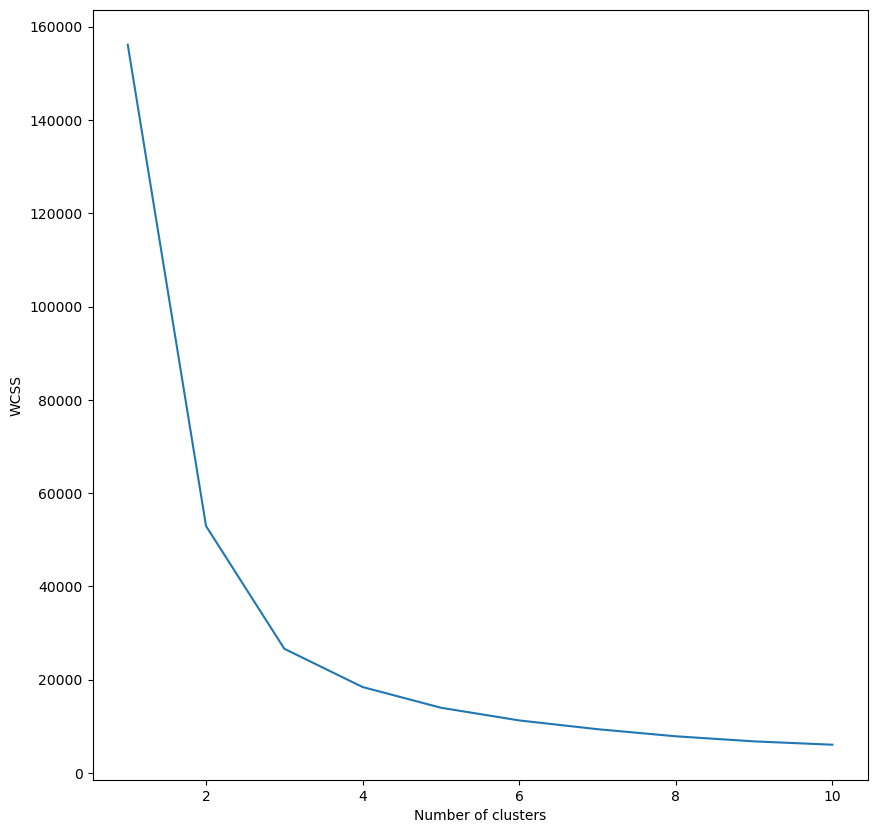

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 3 3 3]


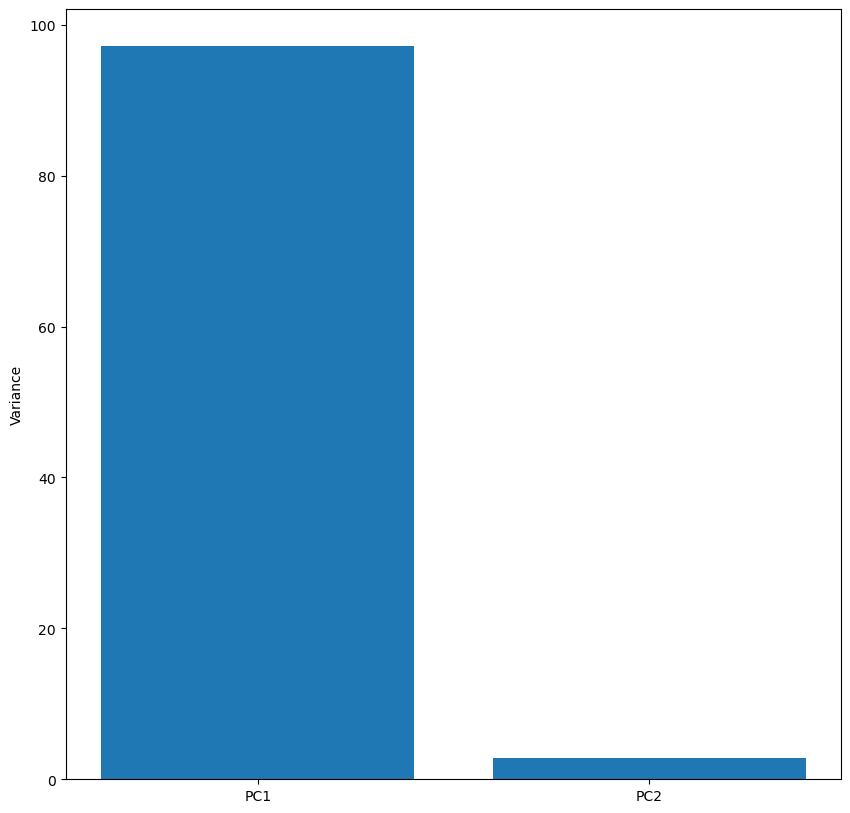

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


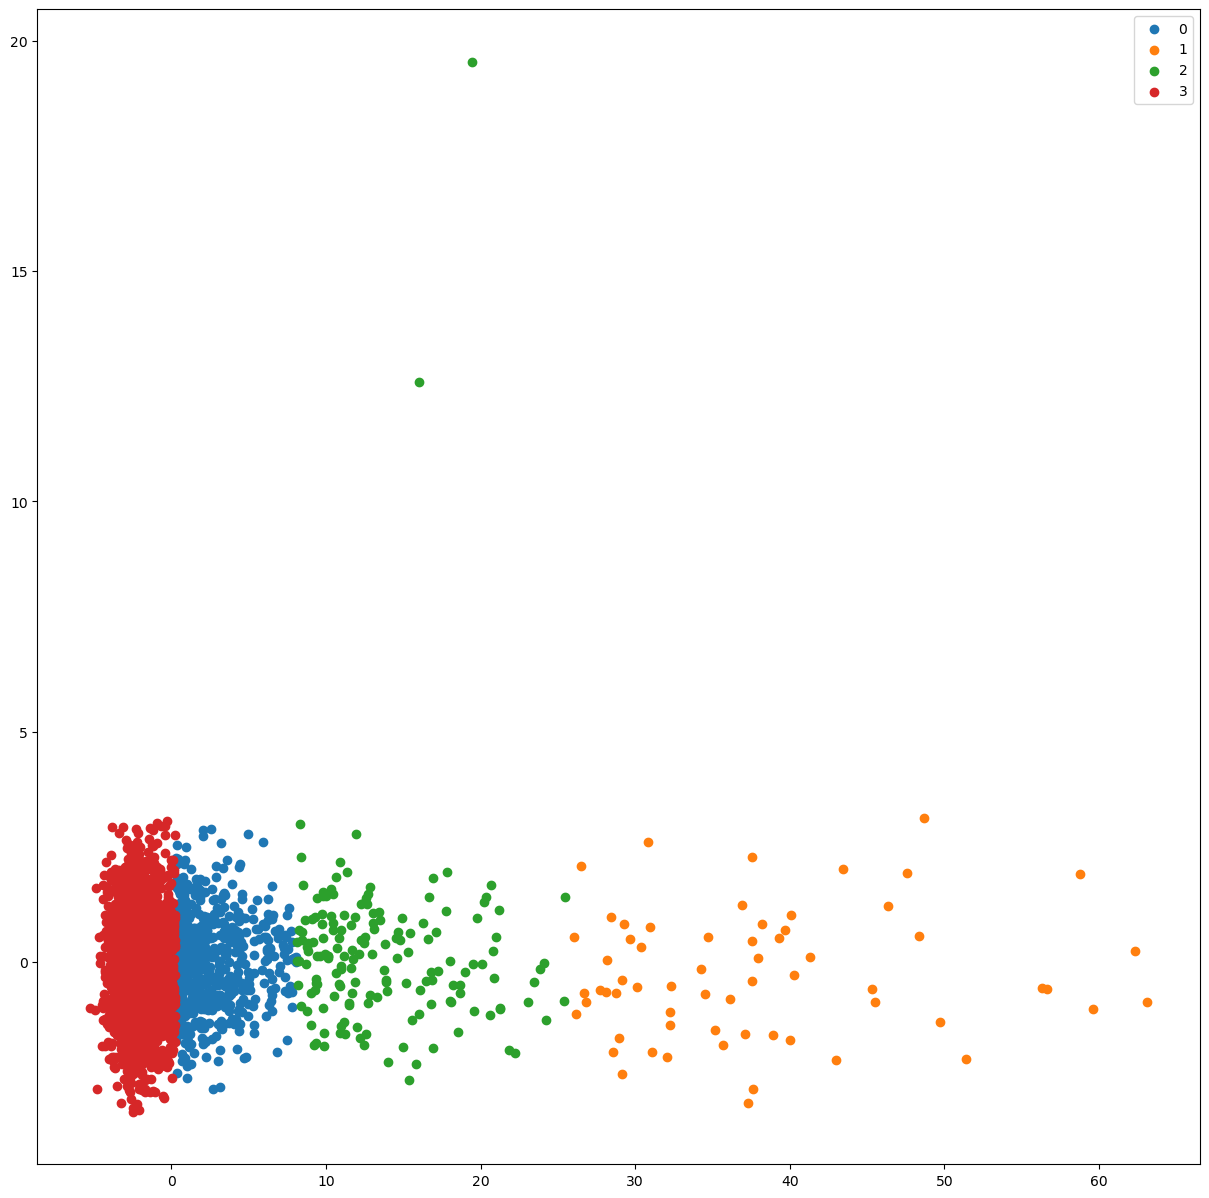

In [70]:
# Apply K-means clustering on the reduced data
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(x)
print(label)

pca = PCA(2)
newdata = pca.fit_transform(x)
newdata

plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x)

plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(newdata[label == i , 0] , newdata[label == i , 1] , label = i)
  
plt.legend()
plt.show()

In [71]:
df = pd.read_csv('Data_For_DataMining/Results/PCA_CV_abs.csv')
x = df.iloc[:,1:]
x

,x_values,y_values
0,31.623785,-14.209520
1,15.570026,2.479363
2,14.162761,0.900719
3,26.592936,-8.546437
4,15.476457,-0.267894
...,...,...
41491,-0.990536,-1.524116
41492,-0.987223,-1.562257
41493,-0.893619,-1.385132
41494,-1.137793,-1.533756


D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-pa

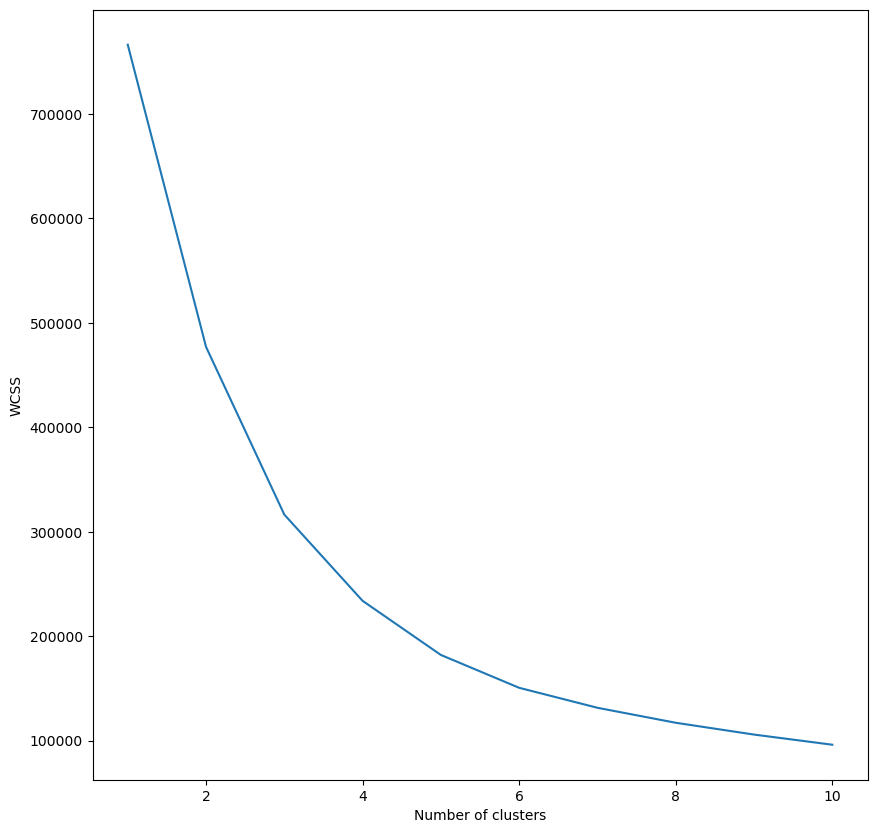

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 0 0 0]


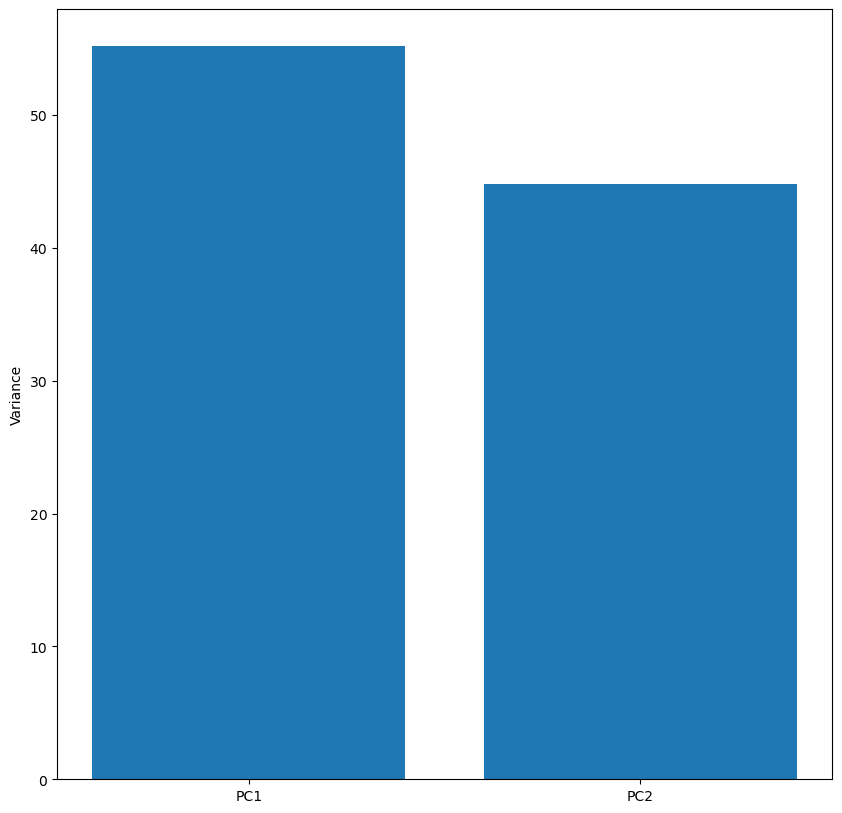

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


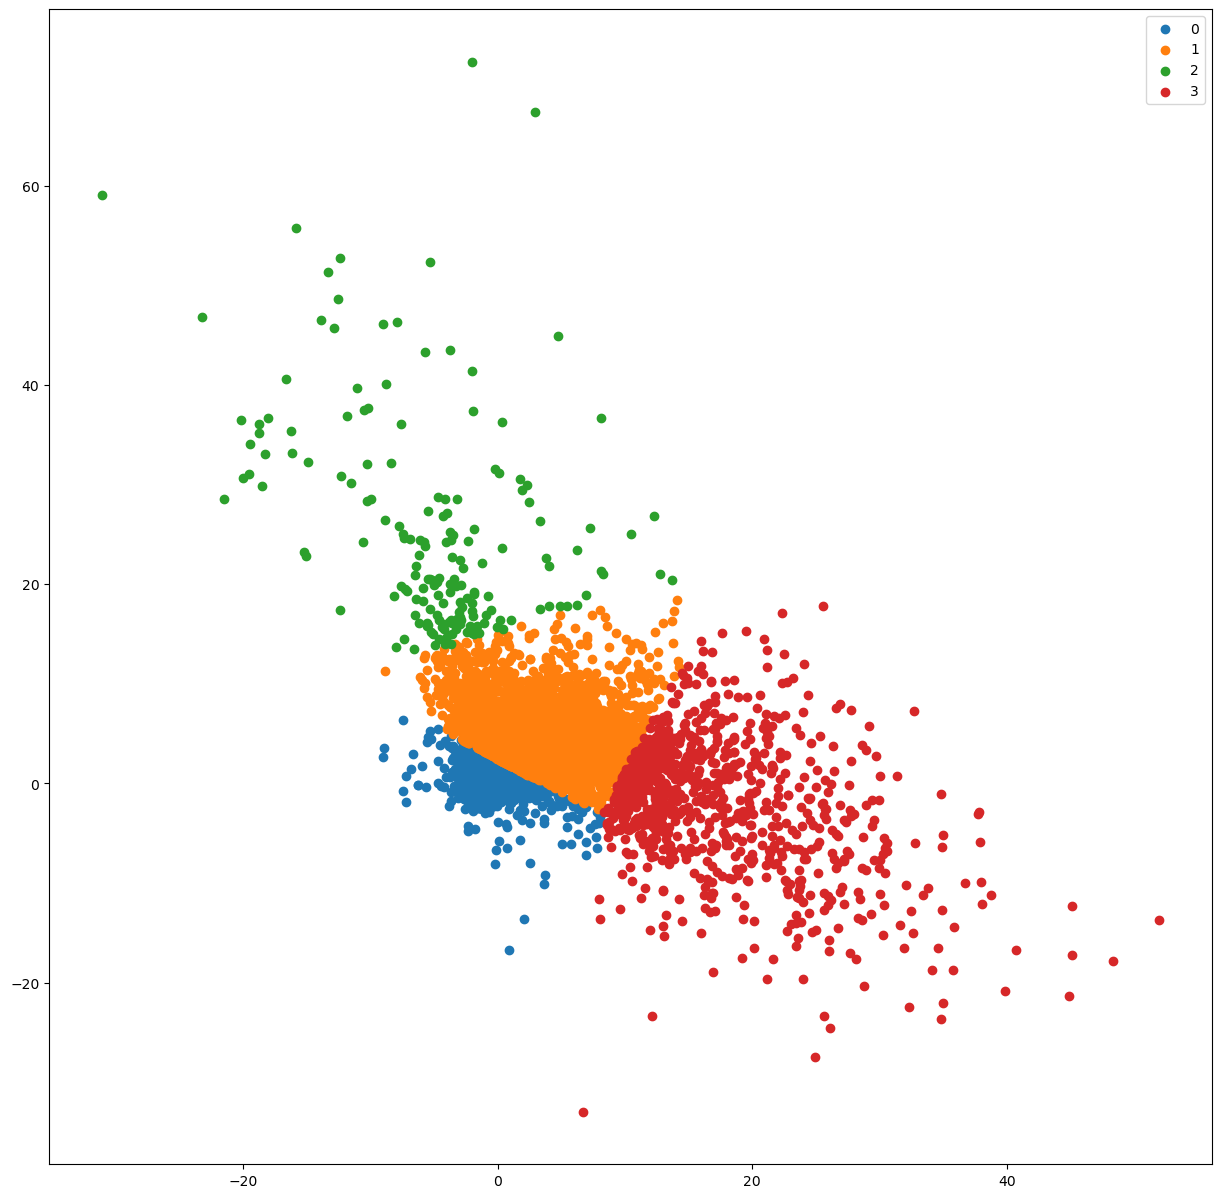

In [72]:
# Apply K-means clustering on the reduced data
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(x)
print(label)

pca = PCA(2)
newdata = pca.fit_transform(x)
newdata

plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x)

plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(newdata[label == i , 0] , newdata[label == i , 1] , label = i)
  
plt.legend()
plt.show()

In [73]:
df = pd.read_csv('Data_For_DataMining/Results/PCA_CV_PROabs.csv')
x = df.iloc[:,1:]
x

,x_values,y_values
0,17.676195,0.475101
1,14.701503,0.702115
2,9.094699,-0.300761
3,3.364285,4.593628
4,7.926505,10.999822
...,...,...
36657,-2.020931,-0.266233
36658,-2.104800,-0.426663
36659,-2.100439,-0.509314
36660,-2.000190,-0.458161


D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-pa

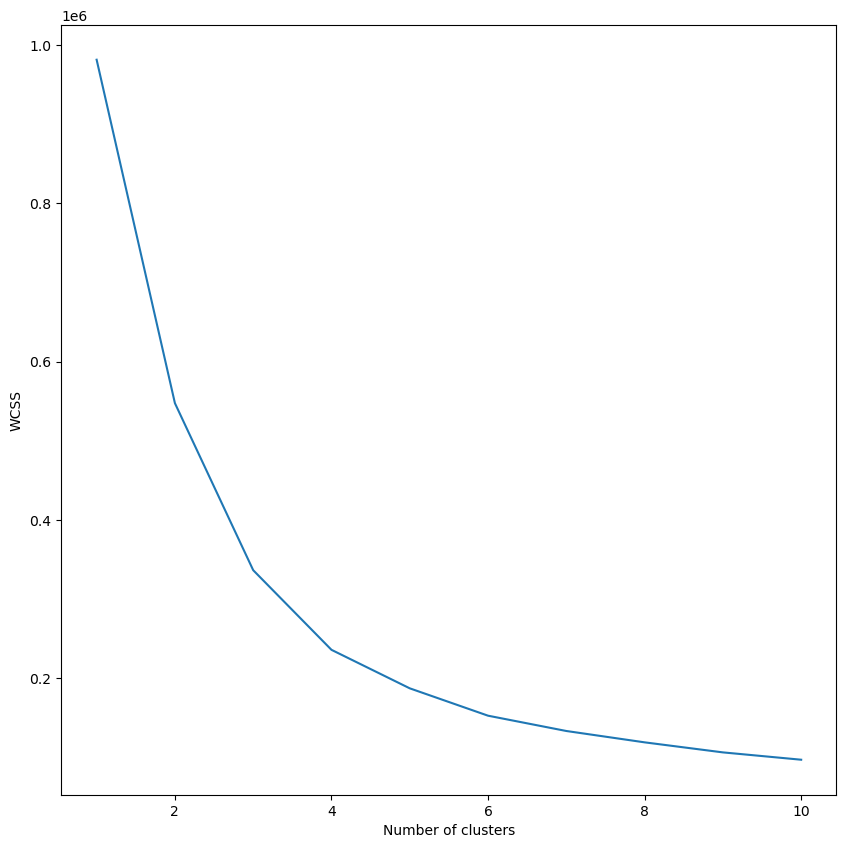

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 3 3 ... 0 0 0]


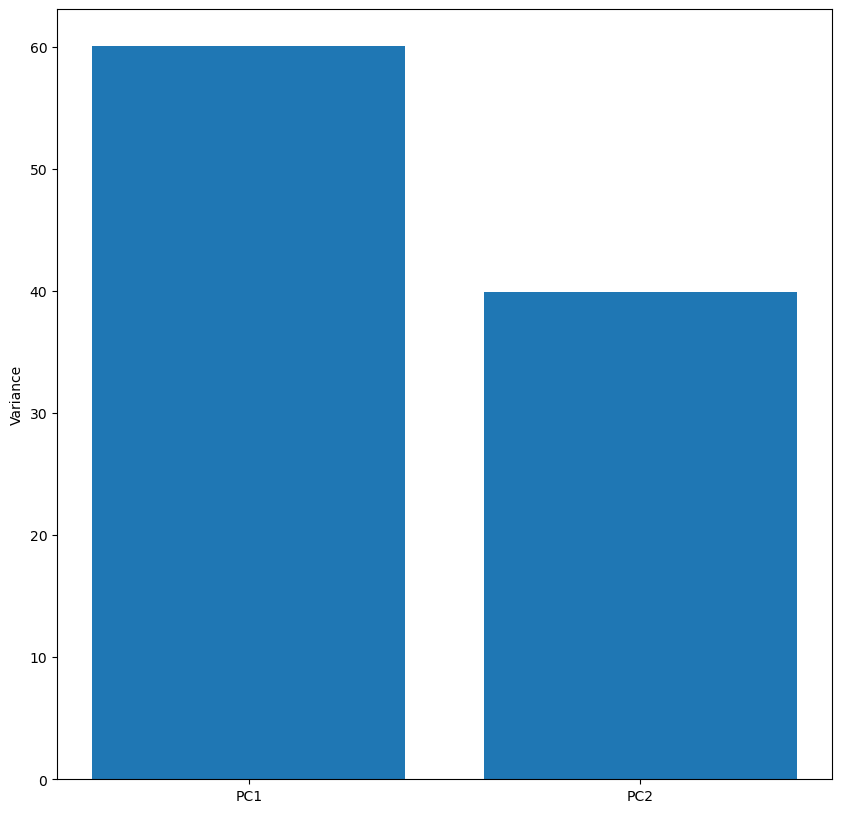

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


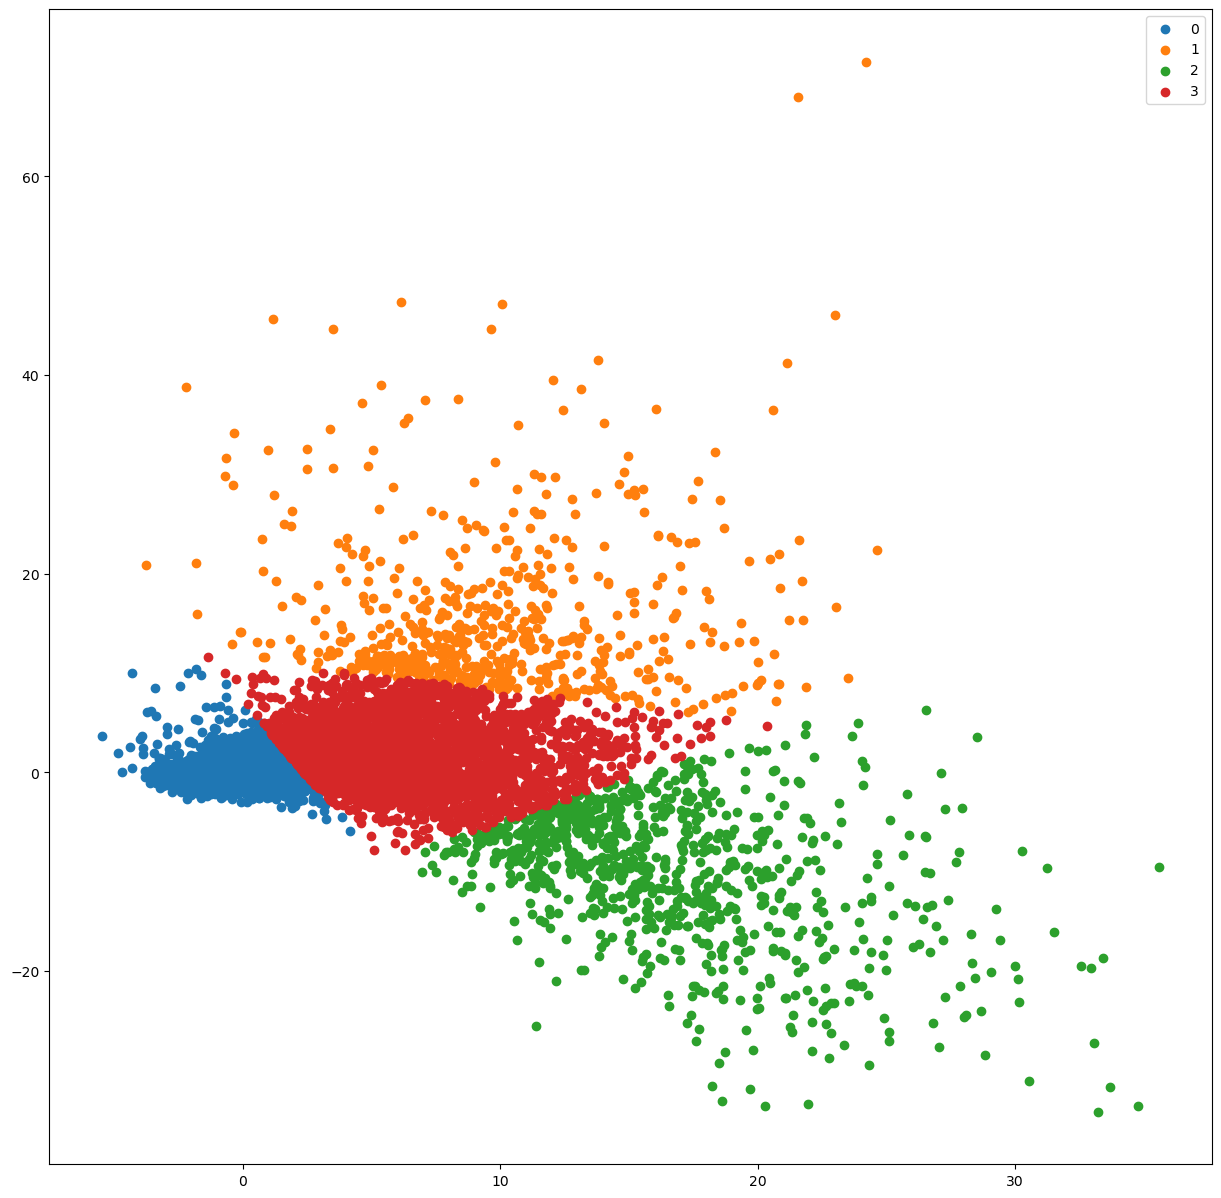

In [74]:
# Apply K-means clustering on the reduced data
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(x)
print(label)

pca = PCA(2)
newdata = pca.fit_transform(x)
newdata

plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x)

plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(newdata[label == i , 0] , newdata[label == i , 1] , label = i)
  
plt.legend()
plt.show()

# K-Means Clustering and Elbow (RL)

In [75]:
df = pd.read_csv('Data_For_DataMining/Results/PCA_RL_Keyword.csv')
x = df.iloc[:,1:]
x

,x_values,y_values
0,46.841730,2.668381
1,28.841900,-1.936248
2,42.598755,-2.237576
3,39.387600,-2.407627
4,32.346760,-1.150425
...,...,...
4517,-3.315607,0.931889
4518,-1.125196,-1.235829
4519,-1.987325,0.105030
4520,-3.402416,0.296343


D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-pa

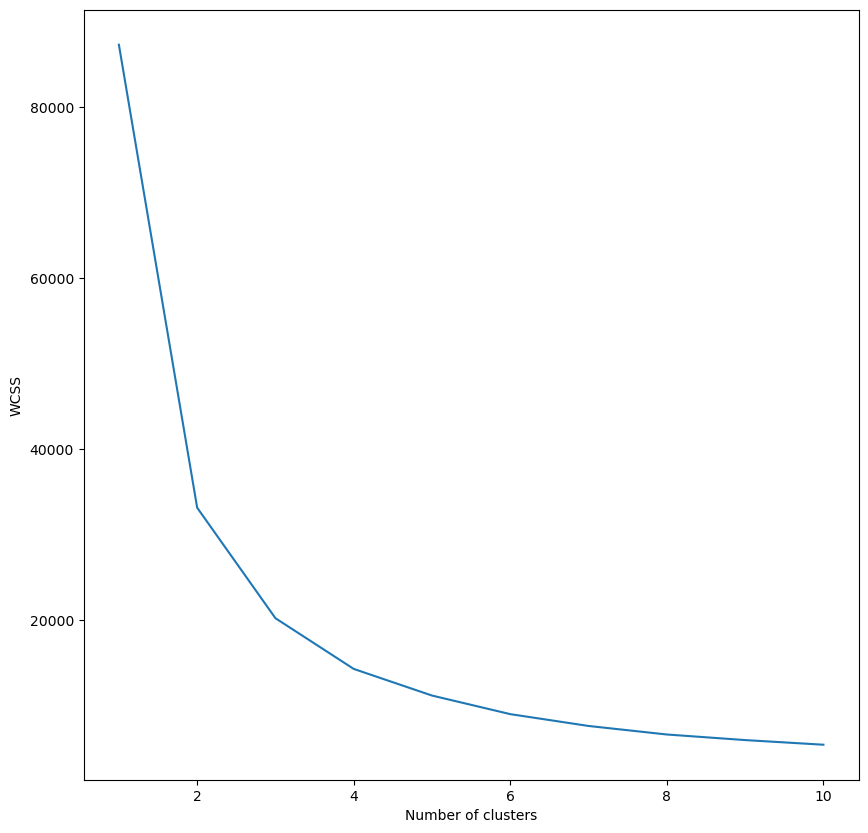

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 0 0 0]


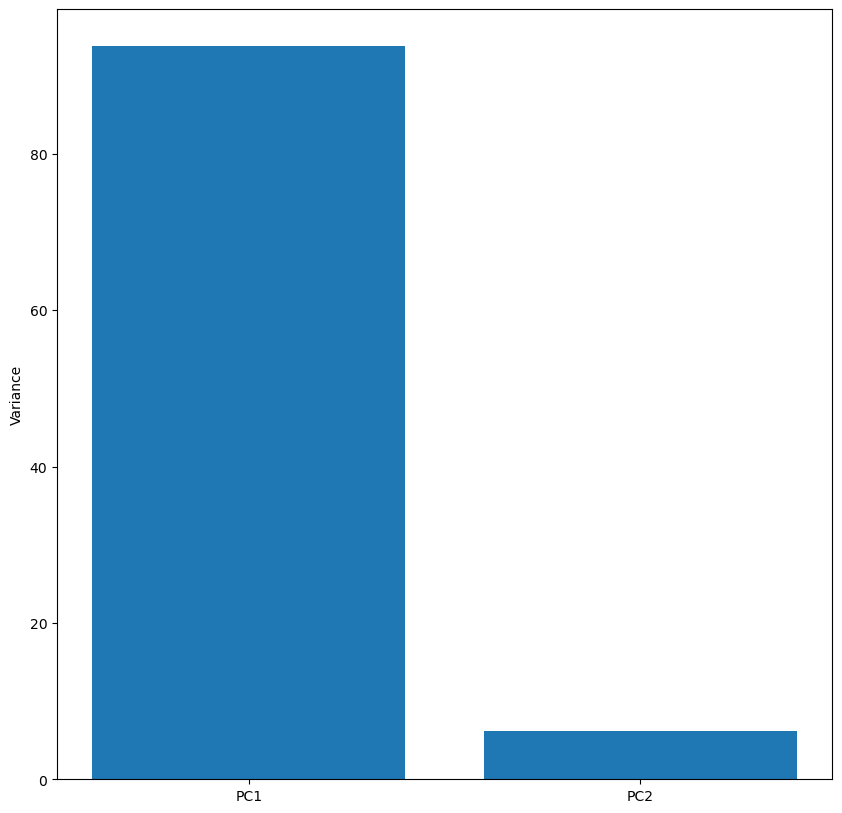

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


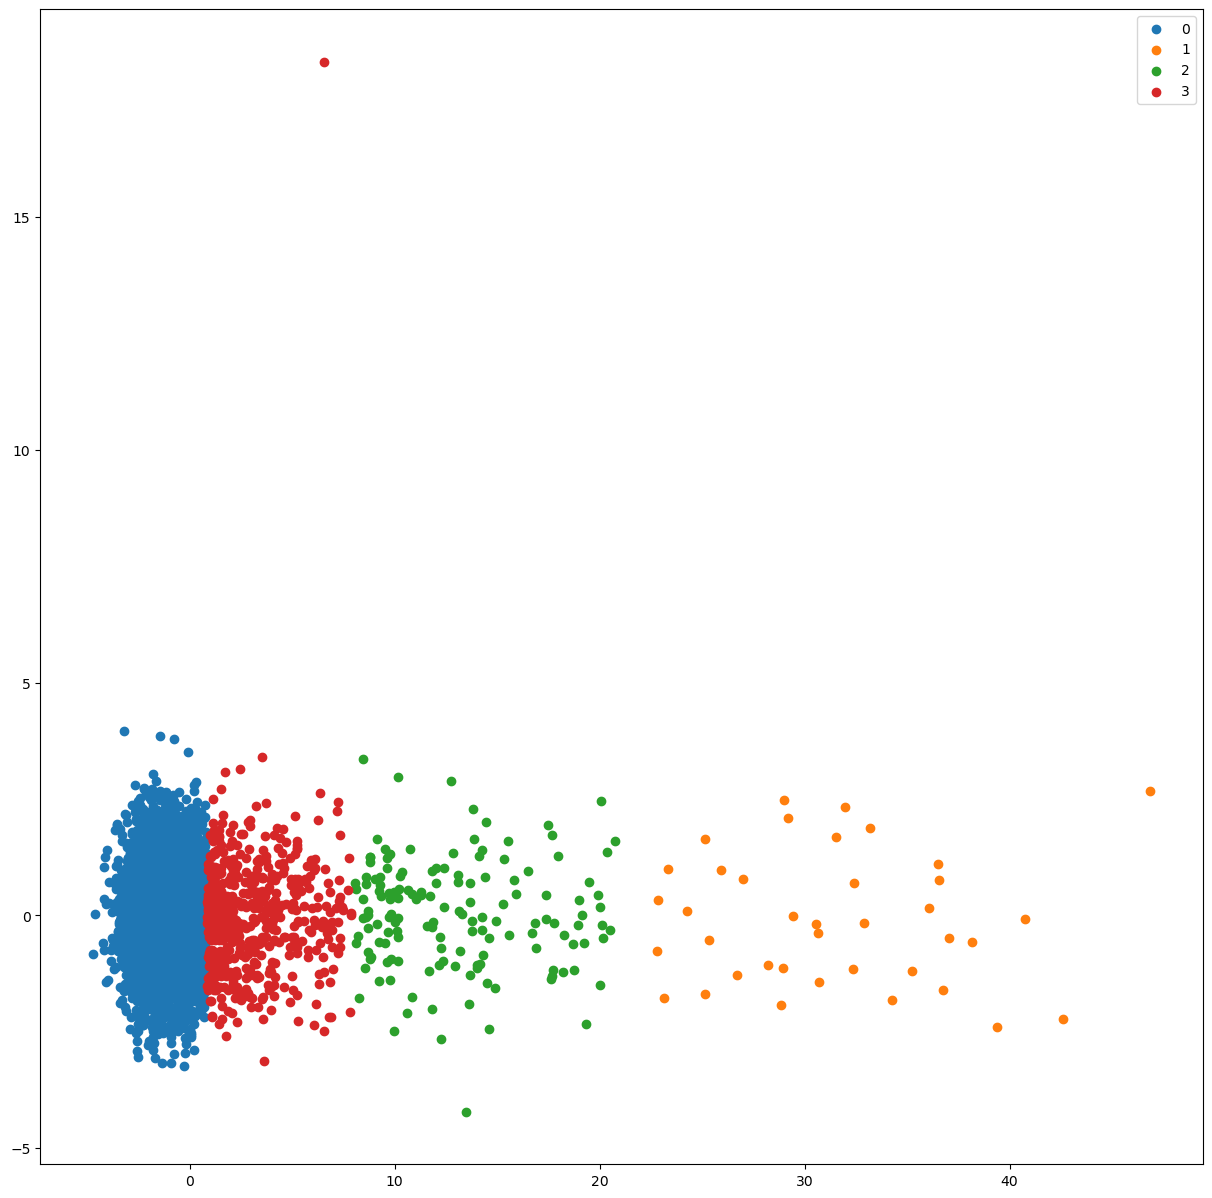

In [76]:
# Apply K-means clustering on the reduced data
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(x)
print(label)

pca = PCA(2)
newdata = pca.fit_transform(x)
newdata

plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x)

plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(newdata[label == i , 0] , newdata[label == i , 1] , label = i)
  
plt.legend()
plt.show()

In [77]:
df = pd.read_csv('Data_For_DataMining/Results/PCA_RL_abs.csv')
x = df.iloc[:,1:]
x

,x_values,y_values
0,23.838995,-18.530620
1,9.826798,-1.579668
2,15.292168,1.729237
3,19.431341,-11.393225
4,12.024750,0.039549
...,...,...
31063,-2.112387,-0.917494
31064,-1.812658,-0.906406
31065,-1.348013,-0.446059
31066,-2.102175,-0.895683


D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-pa

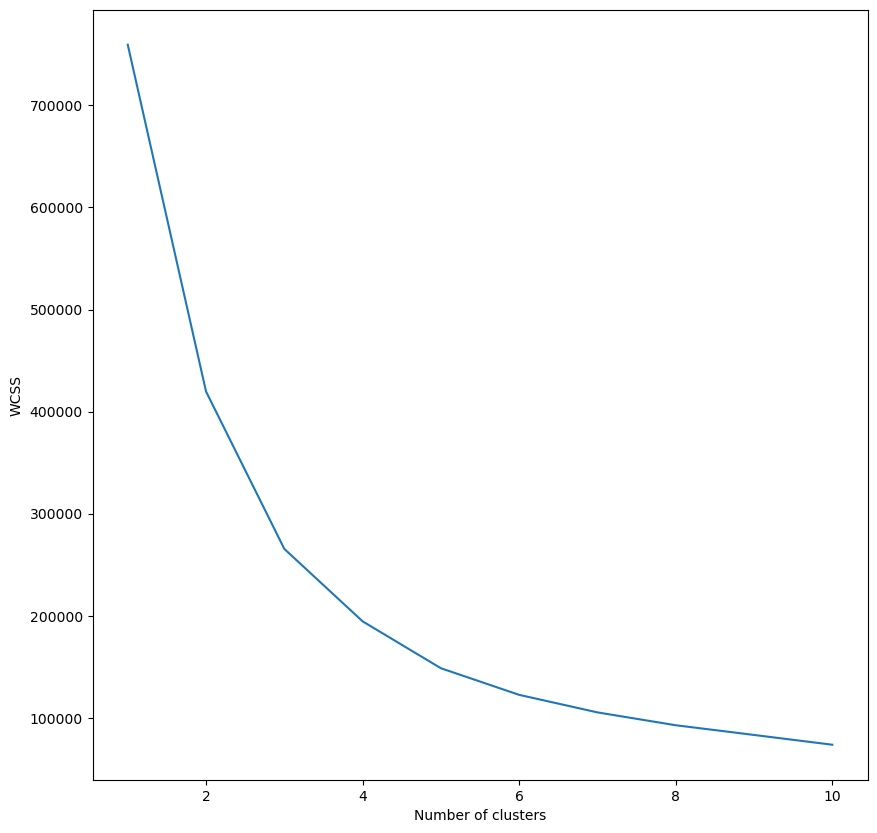

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 1 ... 0 0 0]


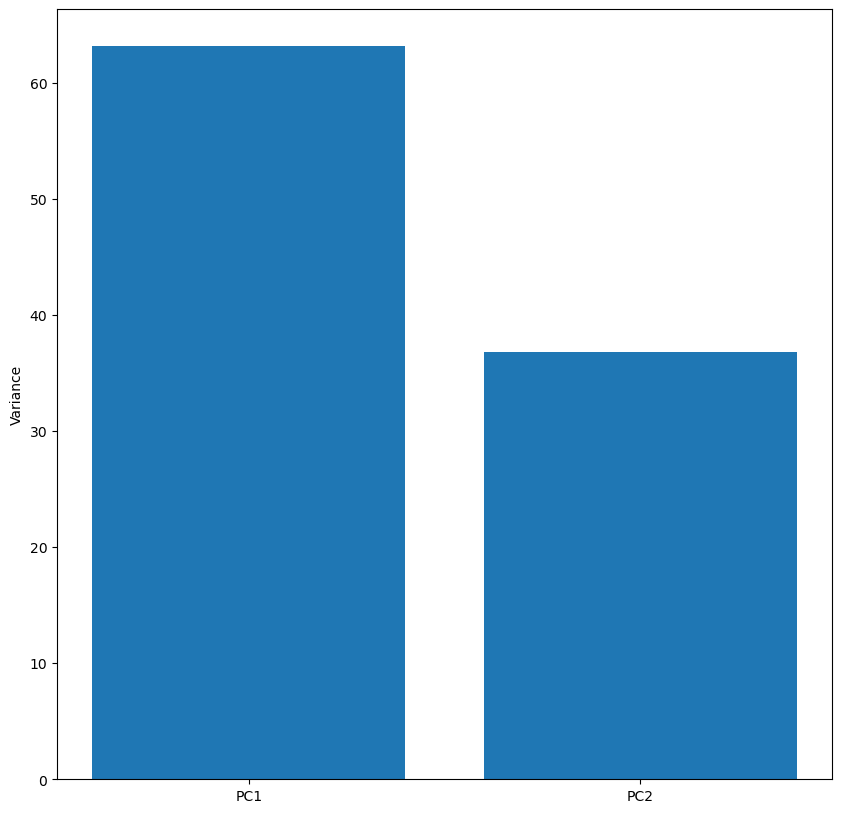

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


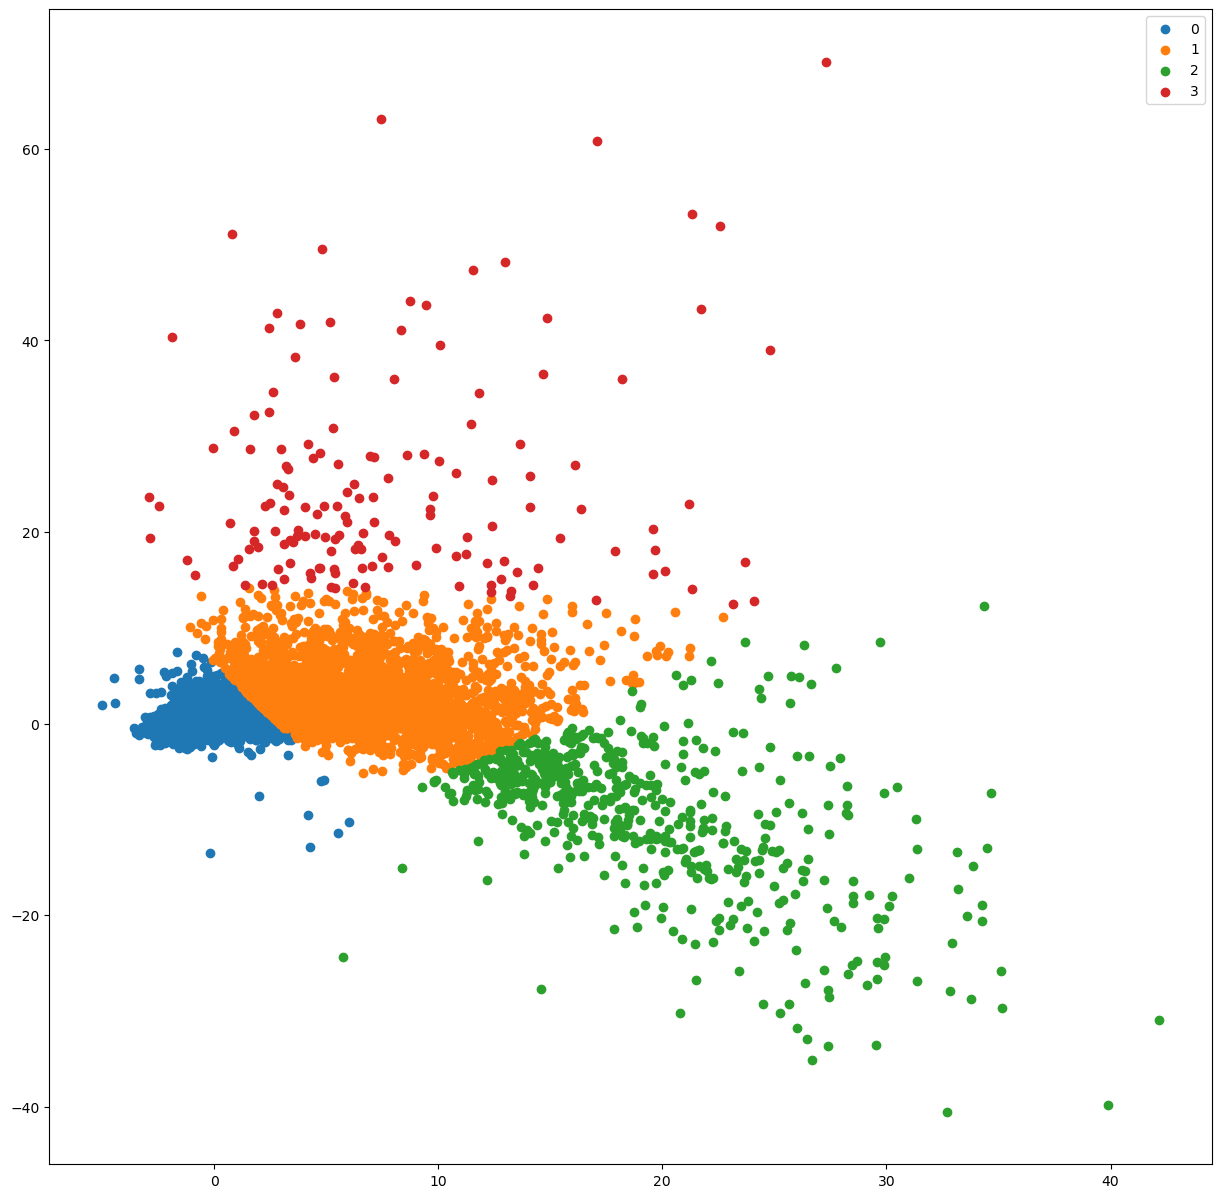

In [78]:
# Apply K-means clustering on the reduced data
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(x)
print(label)

pca = PCA(2)
newdata = pca.fit_transform(x)
newdata

plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x)

plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(newdata[label == i , 0] , newdata[label == i , 1] , label = i)
  
plt.legend()
plt.show()

In [79]:
df = pd.read_csv('Data_For_DataMining/Results/PCA_RL_PROabs.csv')
x = df.iloc[:,1:]
x

,x_values,y_values
0,12.601091,4.828800
1,17.285076,3.652901
2,12.531593,9.518710
3,15.059682,8.950083
4,18.768312,6.876808
...,...,...
27467,-2.887088,0.195897
27468,-3.143571,-0.002367
27469,-3.099436,0.022232
27470,-3.281738,-0.460621


D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Miniconda3\envs\keras_env\Lib\site-pa

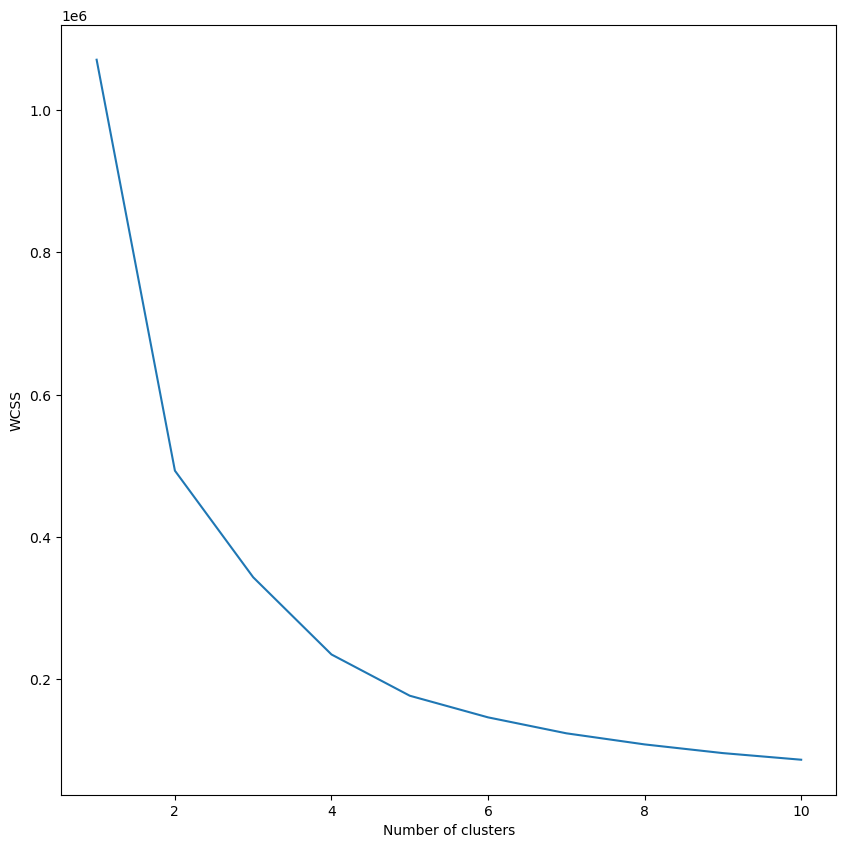

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 1 ... 0 0 0]


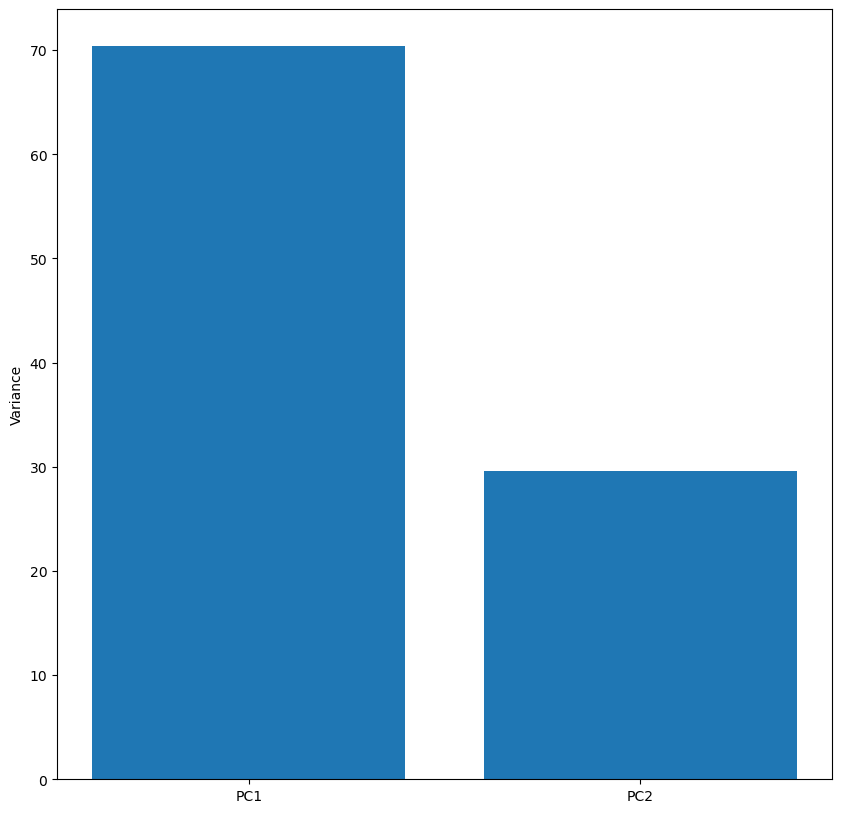

D:\Miniconda3\envs\keras_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


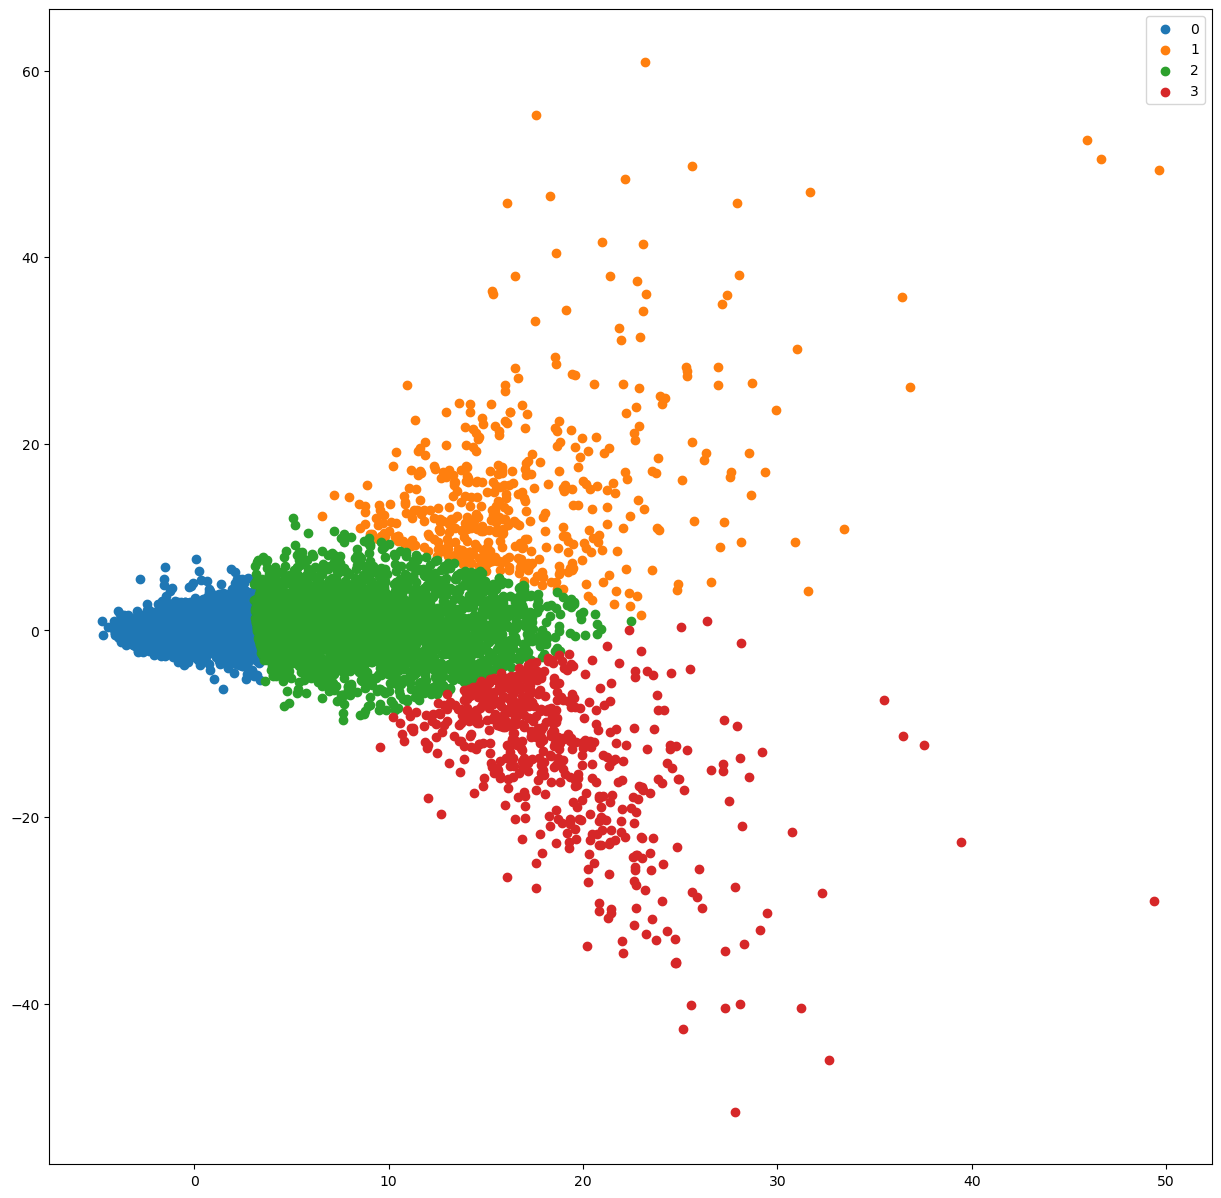

In [80]:
# Apply K-means clustering on the reduced data
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(x)
print(label)

pca = PCA(2)
newdata = pca.fit_transform(x)
newdata

plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x)

plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(newdata[label == i , 0] , newdata[label == i , 1] , label = i)
  
plt.legend()
plt.show()